### Variable Renewable Energy (VRE) assessment and forecast

## Research Question: 
1. How accurately can we predict the PV capacity factor using climate variables?
2. Which climate variables are most influential in determining PV capacity factor across different regions in France?

## Project objectives
<div class="alert alert-block alert-info">

- Assess the solar photovoltaic hourly production over in metropolitan France regions using climate data and capacity factor observations

- Predict the VRE power (capacity factor) ahead of time in the next few days/a week


## Motivation and Description
### Methodology Type:

- Using supervised learning since the task involves predicting a numerical target variable (PV capacity factor) based on known input variables (climate data)

- Utilizing and learning 2/3 methods of Machine Learning (starting from the easiest to more complex)


### Steps and Strategies:

#### Data Preprocessing:

1. Handle Missing Data: Replace or remove missing values (e.g., NaNs) in the dataset to ensure no errors during modeling.

2. Feature Engineering: Compute regional averages of climate variables (if necessary) and remove redundant or non-informative features (e.g., constant columns or zeros).

3. Scaling: Normalize or standardize the climate variable values to ensure all features have comparable scales.

#### Exploratory Data Analysis:

Analyze relationships between climate variables and the PV capacity factor using linear regression and scatter plots.
Perform feature importance analysis using initial linear regression models to identify potential key drivers.

#### Model Selection:

Start with simple models and progressively increase complexity to improve results:

- Baseline Model: Linear Regression with OLS between Climate Variables and Capacity Factor to establish a baseline performance.
- Advanced Models: Using Lasso Regression to find R2/ bagging Regressor, Feature Importances using MDI, Choose between the stacking regressor, AdaBoost regressor, and  voting regressor (compare between DecisionTree, Random Forest and Lasso in each regressor method)
- Neural Networks: 3. RNN -LTSM (If we have time)

## Feature Selection Models:
- Apply Lasso Regression to select the most significant features.
- Use mutual information and correlation matrix to rank the predictive power of each climate variable.

### Evaluation Methods:

- Train-Test Split: Divide the data into training and test sets (e.g., 80%-20%).
- Cross-Validation: Use k-fold cross-validation (e.g., 5-fold) to evaluate model robustness. --> Nested Cross Validation (bonus)

Metrics: Evaluate the models using:
- RMSE (Root Mean Squared Error): To quantify the difference between predicted and actual values.
- R2 (Coefficient of Determination): To assess how well the model explains the variance in the target variable.
- MAE (Mean Absolute Error): To capture prediction error robustness.

### Feature Importance and Interpretability:

- Very useful for tree-based models, use of feature importance scores to identify which climate variables influence PV capacity the most.
- Analyze results regionally to understand spatial variability.

## Complexity Management:

- Start simple (e.g. linear regression) and introduce complexity incrementally.
- Apply regularization techniques (L1 or L2 penalties) in linear models to reduce overfitting.
- Use hyperparameter tuning (e.g. grid search or Bayesian optimization) for tree-based models to balance model complexity with predictive performance.

## Final Model Validation:

Evaluate the best-performing model on the test set to assess generalizability.
Perform robustness checks: 
- Testing on subsets of regions to see if relationships hold consistently.
- Testing on unseen climate variables or time ranges (if data allows).

## Description of Data
- Inputs: 
1. Climate Variables (netcfd) corresponding to each region in France (surface downward radiation, surface temperature, surface density, surface specific humidity) --> polynomials degree 2

- Target Output: The data that we are going to try to predict
1. Capacity Factor(Monthly Capacity Factors)
2. Demand? *if we have time







</div>

### Dataset

- Observed monthly VRE capacity factors averaged over metropolitan France regions from 2014 to 2021
- Climate variables of your choice from a global reanalysis with an hourly sampling from 2010 to 2019

### First steps

- Choose from solar or wind power
- Read about solar/wind production assessment and forecast
- Estimate the hourly solar/wind production

### Reading the data

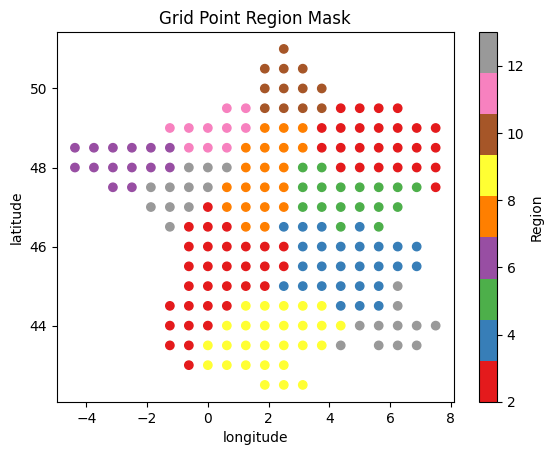

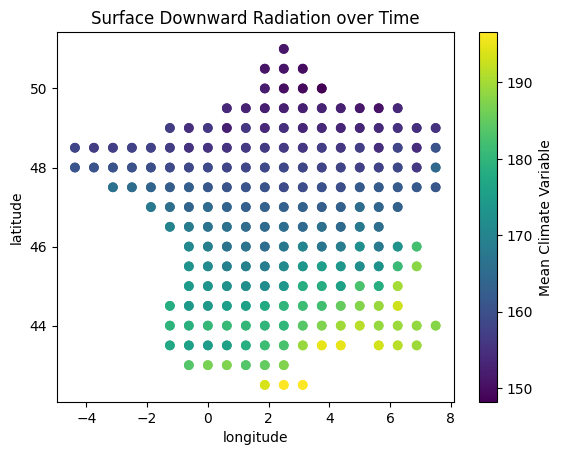

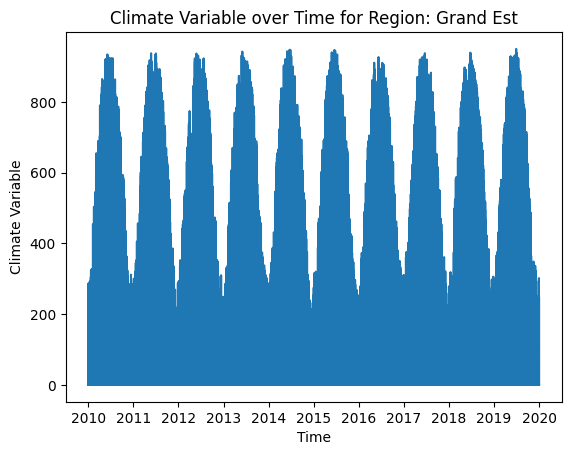

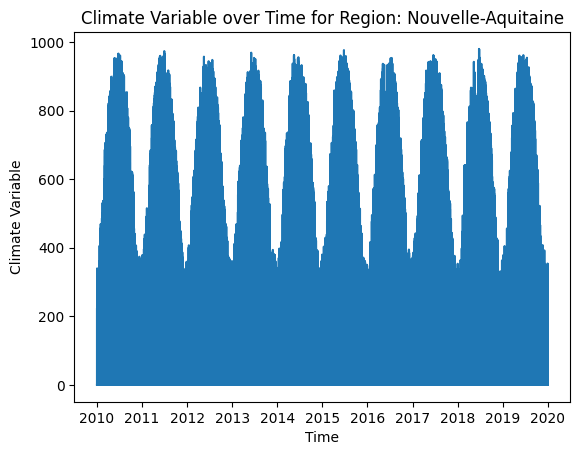

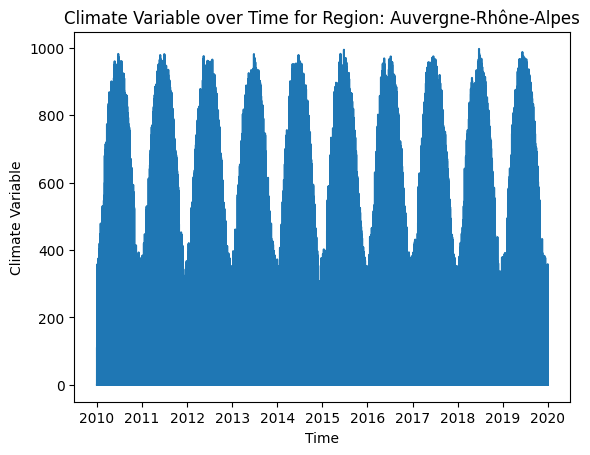

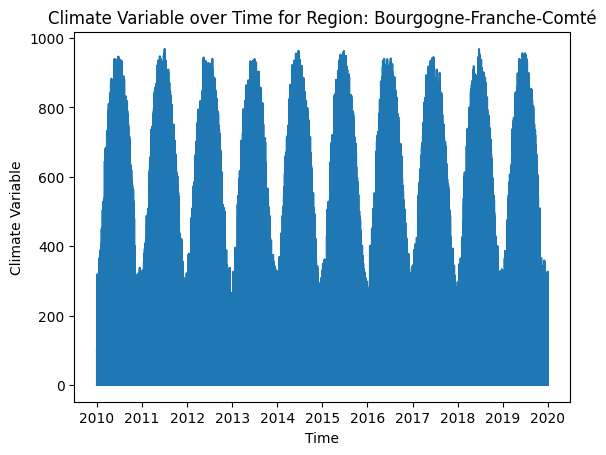

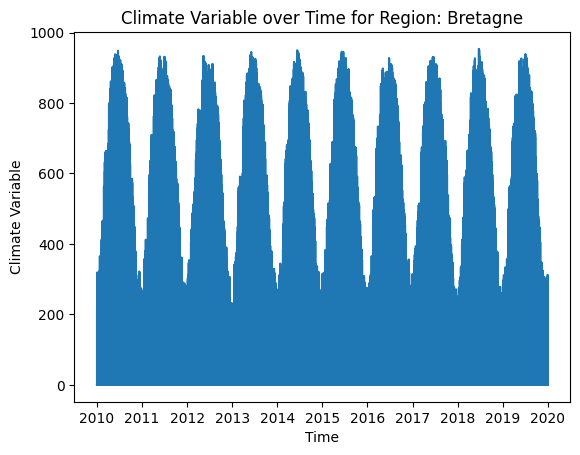

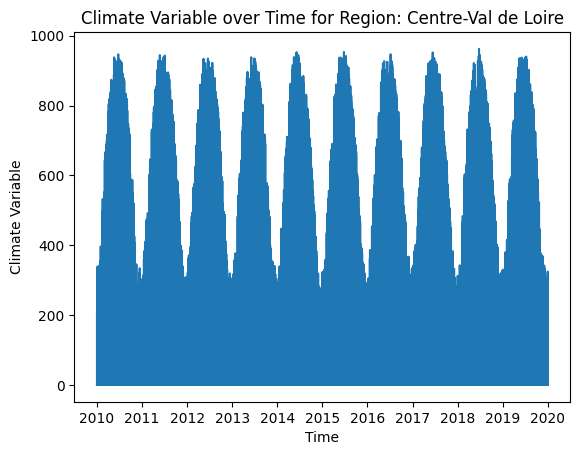

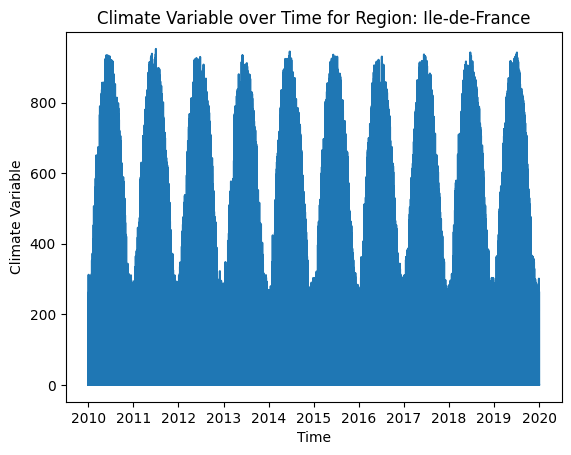

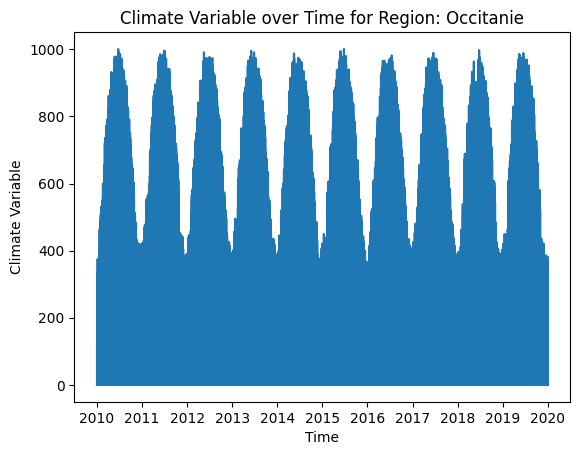

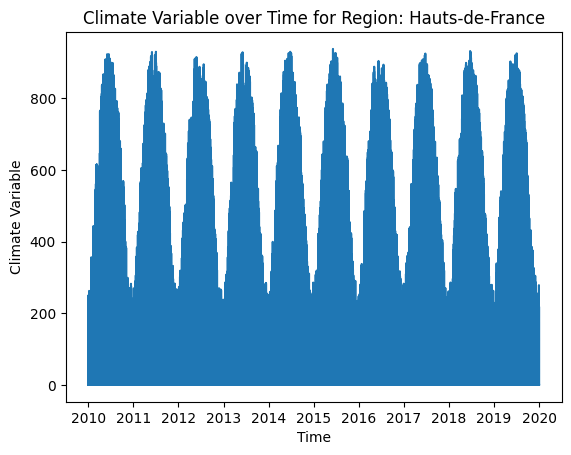

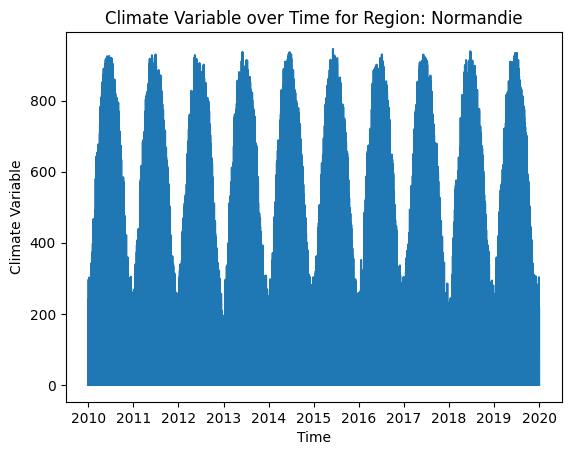

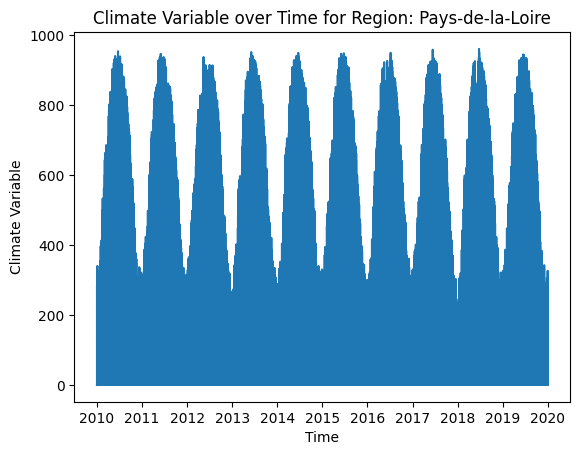

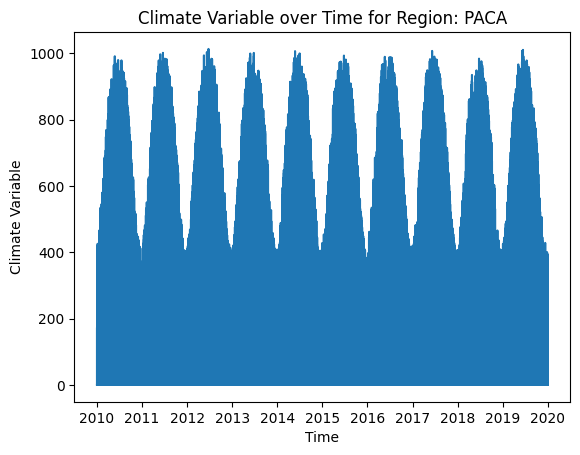

<Figure size 640x480 with 0 Axes>

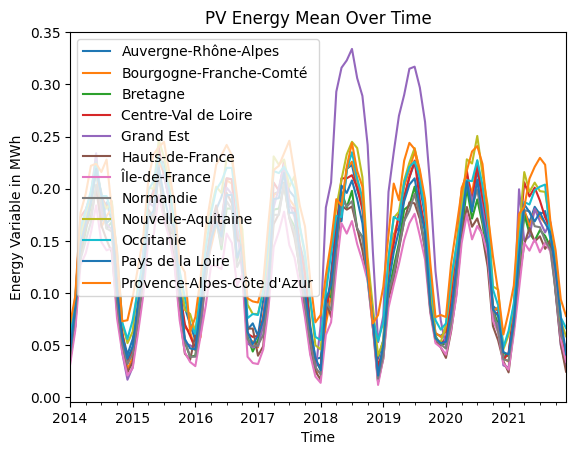

In [7]:
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import numpy as np

# Directories where you saved the data
data_dir_energy = Path('/JODIE/MASTERS/Masters (S2)/InnoEnergy/Ecole Polytechnique/Semestre_1/Machine Learning for Climate Change and Energy/Project/data/energy_france')
data_dir_climate = Path('/JODIE/MASTERS/Masters (S2)/InnoEnergy/Ecole Polytechnique/Semestre_1/Machine Learning for Climate Change and Energy/Project/data/climate_france')
                        
# Template filenames
filename_mask = 'mask_datagouv_french_regions_merra2_Nx_France.nc'
filename_climate = 'merra2_area_selection_output_{}_merra2_2010-2019.nc'
filename_energy = 'reseaux_energies_{}.csv'

# Set keyword arguments for pd.read_csv
kwargs_read_csv = dict(index_col=0, header=0, parse_dates=True)

# Read and plot grid point-region mask
filepath_mask = Path(data_dir_climate, filename_mask)
ds_mask = xr.load_dataset(filepath_mask)
da_mask = ds_mask['mask']
plt.figure()
plt.title('Grid Point Region Mask')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.scatter(da_mask['lon'], da_mask['lat'], c=da_mask, cmap='Set1')
plt.colorbar(label='Region')

# Read a climate variable and plot its mean over time
variable_name = 'surface_downward_radiation'
filename = filename_climate.format(variable_name)
filepath = Path(data_dir_climate, filename)
da_climate = xr.load_dataset(filepath)[variable_name]
plt.figure()
plt.title('Surface Downward Radiation over Time')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.scatter(da_mask['lon'], da_mask['lat'], c=da_climate.mean('time'))
sc_climate = plt.scatter(da_mask['lon'], da_mask['lat'], c=da_climate.mean('time'))
plt.colorbar(sc_climate, label='Mean Climate Variable')

# Compute regional mean of climate variable
da_climate_reg = da_climate.groupby(da_mask).mean().rename(mask='region')
da_climate_reg['region'] = ds_mask['region'].values

# Plot time series for the regional mean climate variable with 'region' as hue
#plt.figure()
#da_climate_reg.plot.line(x='time', hue='region', alpha=0.7, linewidth=1.5)
#plt.xlabel('Time')
#plt.ylabel('Regional Mean of Climate Variable')
#plt.title('Regional Mean of Climate Variable over Time')
#plt.show()
regions = da_climate_reg['region'].values  # Assuming 'region' is a coordinate or dimension


for region_name in regions:
    plt.figure()
    da_climate_reg.sel(region=region_name).plot.line(x='time')
    plt.xlabel('Time')
    plt.ylabel('Climate Variable')
    plt.title(f'Climate Variable over Time for Region: {region_name}')
    plt.show()
    
# Plot energy variable time series
variable_name = 'capacityfactor_pv'
filename = filename_energy.format(variable_name)
filepath = Path(data_dir_energy, filename)
df_energy = pd.read_csv(filepath, index_col=0, header=0, parse_dates=True)
plt.figure()
df_energy.plot()
plt.title('PV Energy Mean Over Time')
plt.xlabel('Time')
plt.ylabel('Energy Variable in MWh')

plt.show()

In [33]:
# Path manipulation module
from pathlib import Path
# Numerical analysis module
import numpy as np
# Formatted numerical analysis module
import pandas as pd
# Structured dataset analysis module
import xarray as xr
# Plot module
import matplotlib.pyplot as plt
# Default colors
RC_COLORS = plt.rcParams['axes.prop_cycle'].by_key()['color']
# Matplotlib configuration
plt.rc('font', size=14)

# Set data directory
data_dir = Path('data')

# Set keyword arguments for pd.read_csv
kwargs_read_csv = dict(index_col=0, parse_dates=True) 

# Define capacity factor filepath and label
pvcf_filename = 'energy_france/reseaux_energies_capacityfactor_pv.csv'
pvcf_filepath = Path(data_dir, pvcf_filename)
pvcf_label = 'Wind capacity factor'

# Read pvcf data with pandas                                                                                                                                                
df_pvcf_daily = pd.read_csv(pvcf_filepath, **kwargs_read_csv)

# Resample pv capacity factor from daily to monthly means
df_energy_reg = df_energy.resample('MS').mean()

# Define surface downward radiation filepath and label
START_DATE = '20100101'
END_DATE = '20200101'
sdr_filename = 'climate_france/merra2_area_selection_output_surface_downward_radiation_merra2_2010-2019.nc'.format(START_DATE, END_DATE)
sdr_filepath = Path(data_dir, sdr_filename)
sdr_label = 'Surface Downward Radiation (J m-2)'

# Read geopotential height dataset with xarray                                                                                                                                
ds = xr.load_dataset(sdt_filepath)

# Select geopotential height variable                                                                                                                                         
sdr_name = 'surface_downward_radiation'                                                                                                                                                     
da_sdr_hr = ds[sdr_name]
da_sdr_hr = da_sdr_hr.unstack()

# Downsample geopotential height
#N_GRID_AVG = 8
#da_sdr = da_sdr_hr.coarsen(lat=N_GRID_AVG, boundary='trim').mean().coarsen(                                                                                                 
 #   lon=N_GRID_AVG, boundary='trim').mean()

# Remove seasonal cycle from wind capacity factor
#da_pvcf_reg = df_energy_reg.to_xarray()                                                                                                                                 
#sdr_pvcf_cycle = da_pvcf_reg.groupby('time.month')                                                                                                                     
#da_pvcf_anom = sdr_pvcf_cycle - sdr_pvcf_cycle.mean('time')                                                                                                           
#df_pvcf_anom = da_pvcf_anom.drop('month').to_dataframe()

#df_pvcf_anom




Dimensions of da_sdr_hr: ('time', 'stacked_dim')


Processed data dimensions: ('time', 'region')

Regions: ['Grand Est' 'Nouvelle-Aquitaine' 'Auvergne-Rhône-Alpes'
 'Bourgogne-Franche-Comté' 'Bretagne' 'Centre-Val de Loire'
 'Ile-de-France' 'Occitanie' 'Hauts-de-France' 'Normandie'
 'Pays-de-la-Loire' 'PACA']


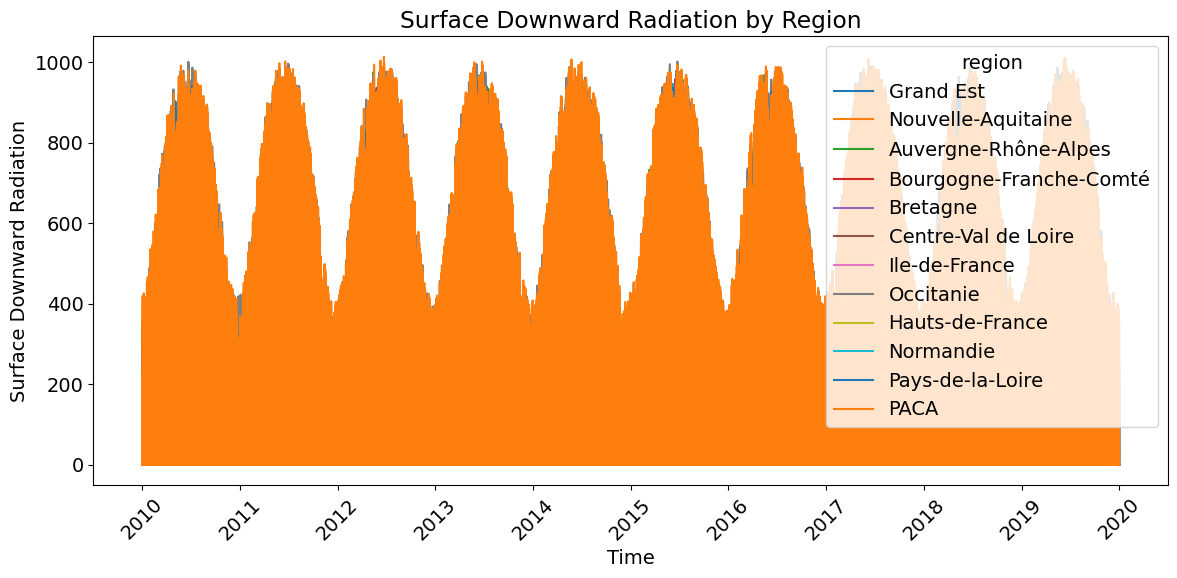

In [34]:
# Load the mask file first to get region mapping
mask_filepath = Path(data_dir_climate, filename_mask)
ds_mask = xr.load_dataset(mask_filepath)
da_mask = ds_mask['mask']

# Load the surface downward radiation data
sdr_filepath = Path(data_dir_climate, 'merra2_area_selection_output_surface_downward_radiation_merra2_2010-2019.nc')
ds_sdr = xr.load_dataset(sdr_filepath)
da_sdr = ds_sdr['surface_downward_radiation']

# Group by mask to get regional averages
da_sdr_regional = da_sdr.groupby(da_mask).mean().rename(mask='region')

# Add region names from the mask dataset
da_sdr_regional['region'] = ds_mask['region'].values

# Convert to more manageable time frequency if needed (e.g., daily or monthly means)
da_sdr_regional_monthly = da_sdr_regional.resample(time='MS').mean()

# Print info about the processed data
print("Processed data dimensions:", da_sdr_regional.dims)
print("\nRegions:", da_sdr_regional.region.values)

# Optional: Create a quick visualization to verify the data
plt.figure(figsize=(12, 6))
da_sdr_regional.plot.line(x='time', hue='region')
plt.title('Surface Downward Radiation by Region')
plt.xlabel('Time')
plt.ylabel('Surface Downward Radiation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


PV Capacity Factor Data:
            Auvergne-Rhône-Alpes  Bourgogne-Franche-Comté  Bretagne  \
time                                                                  
2014-01-01                 0.051                    0.048     0.045   
2014-02-01                 0.079                    0.078     0.081   
2014-03-01                 0.156                    0.161     0.134   
2014-04-01                 0.174                    0.179     0.159   
2014-05-01                 0.187                    0.195     0.184   

            Centre-Val de Loire  Grand Est  Hauts-de-France  Île-de-France  \
time                                                                         
2014-01-01                0.048      0.044            0.035          0.031   
2014-02-01                0.092      0.068            0.068          0.064   
2014-03-01                0.173      0.156            0.141          0.127   
2014-04-01                0.180      0.169            0.163          0.138   
2014-05-

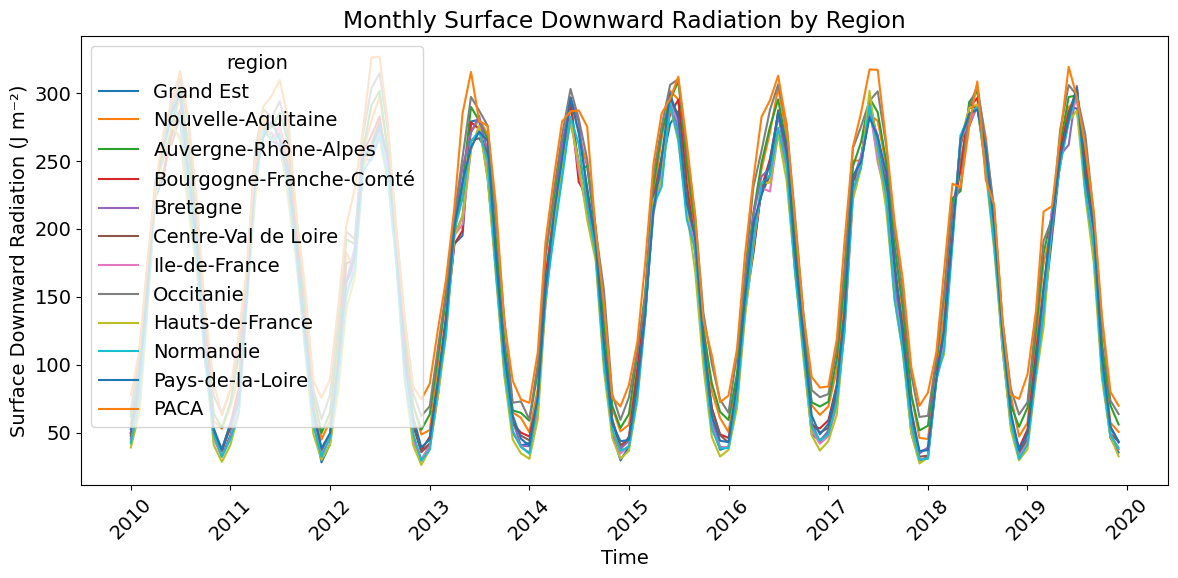

In [35]:
# Path manipulation module and other imports remain the same...

# Set data directories
data_dir = Path('data')
data_dir_energy = data_dir / 'energy_france'
data_dir_climate = data_dir / 'climate_france'

# Set keyword arguments for pd.read_csv
kwargs_read_csv = dict(index_col=0, parse_dates=True) 

# 1. Load PV capacity factor data
pvcf_filename = 'reseaux_energies_capacityfactor_pv.csv'
pvcf_filepath = data_dir_energy / pvcf_filename
df_pvcf_daily = pd.read_csv(pvcf_filepath, **kwargs_read_csv)

# Resample to monthly means
df_pvcf_monthly = df_pvcf_daily.resample('MS').mean()

# 2. Load and process climate data
# Load mask first
mask_filename = 'mask_datagouv_french_regions_merra2_Nx_France.nc'
mask_filepath = data_dir_climate / mask_filename
ds_mask = xr.load_dataset(mask_filepath)
da_mask = ds_mask['mask']

# Load surface downward radiation data
sdr_filename = 'merra2_area_selection_output_surface_downward_radiation_merra2_2010-2019.nc'
sdr_filepath = data_dir_climate / sdr_filename
ds_sdr = xr.load_dataset(sdr_filepath)
da_sdr = ds_sdr['surface_downward_radiation']

# 3. Process regional data
# Calculate regional averages
da_sdr_regional = da_sdr.groupby(da_mask).mean().rename(mask='region')
da_sdr_regional['region'] = ds_mask['region'].values

# Convert to monthly means to match PV data
da_sdr_monthly = da_sdr_regional.resample(time='MS').mean()

# Convert to DataFrame for easier manipulation
df_sdr_monthly = da_sdr_monthly.to_dataframe('surface_downward_radiation').unstack('region')
df_sdr_monthly.columns = df_sdr_monthly.columns.droplevel(0)  # Remove the 'surface_downward_radiation' level

# Verify the data
print("\nPV Capacity Factor Data:")
print(df_pvcf_monthly.head())

# Create visualization
plt.figure(figsize=(12, 6))
da_sdr_monthly.plot.line(x='time', hue='region')
plt.title('Monthly Surface Downward Radiation by Region')
plt.xlabel('Time')
plt.ylabel('Surface Downward Radiation (J m⁻²)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [36]:
print("\nSurface Downward Radiation Data:")
print(df_sdr_monthly.head())


Surface Downward Radiation Data:
region       Grand Est  Nouvelle-Aquitaine  Auvergne-Rhône-Alpes  \
time                                                               
2010-01-01   45.450001           56.676620             61.891178   
2010-02-01   66.637657           93.542099             96.567177   
2010-03-01  139.414459          161.307190            159.204163   
2010-04-01  223.208099          232.158630            227.278168   
2010-05-01  237.565063          251.229370            241.437653   

region      Bourgogne-Franche-Comté    Bretagne  Centre-Val de Loire  \
time                                                                   
2010-01-01                49.477009   49.993095            47.721348   
2010-02-01                78.436684   82.344009            81.132645   
2010-03-01               141.713379  141.412781           145.349854   
2010-04-01               229.187103  233.302261           230.400177   
2010-05-01               240.941452  252.884750          

Original data dimensions: ('time', 'stacked_dim')

Coordinates:
Coordinates:
  * time     (time) datetime64[ns] 701kB 2010-01-01 ... 2019-12-31T23:00:00
    lat      (stacked_dim) float64 2kB 42.5 42.5 42.5 43.0 ... 50.5 50.5 51.0
    lon      (stacked_dim) float64 2kB 1.875 2.5 3.125 -0.625 ... 2.5 3.125 2.5

Could not unstack dimensions. Working with stacked data.

Study period covers 6 years from 2014 to 2019
Shape of PV capacity factor anomalies: (72, 13)
Shape of surface radiation anomalies: (72, 820)
Number of grid points/locations: 820


<Figure size 1200x600 with 0 Axes>

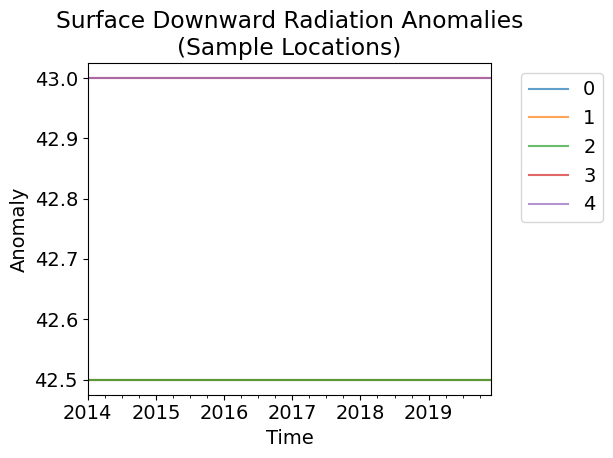

In [38]:
# Load the raw surface downward radiation data
sdr_filepath = Path(data_dir_climate, 'merra2_area_selection_output_surface_downward_radiation_merra2_2010-2019.nc')
ds_sdr = xr.load_dataset(sdr_filepath)
da_sdr = ds_sdr['surface_downward_radiation']

# First, let's examine the structure
print("Original data dimensions:", da_sdr.dims)
print("\nCoordinates:")
print(da_sdr.coords)

# If data is stacked, try to unstack it first
if 'stacked_dim' in da_sdr.dims:
    try:
        # Method 1: Try to recover original coordinates
        da_sdr = da_sdr.unstack('stacked_dim')
    except:
        # Method 2: If that doesn't work, we'll work with stacked dimensions
        print("\nCould not unstack dimensions. Working with stacked data.")
        
        # Remove seasonal cycle from surface downward radiation
        gp_sdr_cycle = da_sdr.groupby('time.month')
        da_sdr_anom = gp_sdr_cycle - gp_sdr_cycle.mean('time')
        
        # Convert to DataFrame with stacked points as columns
        df_sdr_anom = (da_sdr_anom
                      .to_dataframe('surface_downward_radiation')
                      .unstack('stacked_dim'))
        
        if isinstance(df_sdr_anom.columns, pd.MultiIndex):
            df_sdr_anom.columns = df_sdr_anom.columns.droplevel(0)

# Process PV capacity factor data
da_pvcf_reg = df_pvcf_monthly.to_xarray()
gp_pvcf_cycle = da_pvcf_reg.groupby('time.month')
da_pvcf_anom = gp_pvcf_cycle - gp_pvcf_cycle.mean('time')
df_pvcf_anom = da_pvcf_anom.to_dataframe()

# Select common time index
idx = df_sdr_anom.index.intersection(df_pvcf_anom.index)
df_sdr_anom = df_sdr_anom.loc[idx]
df_pvcf_anom = df_pvcf_anom.loc[idx]

# Calculate study period
time = df_pvcf_anom.index
n_years = time.year.max() - time.year.min() + 1

# Print information
print(f"\nStudy period covers {n_years} years from {time.year.min()} to {time.year.max()}")
print("Shape of PV capacity factor anomalies:", df_pvcf_anom.shape)
print("Shape of surface radiation anomalies:", df_sdr_anom.shape)
print(f"Number of grid points/locations: {df_sdr_anom.shape[1]}")

# Visualize sample of locations
plt.figure(figsize=(12, 6))
df_sdr_anom.iloc[:, :5].plot(alpha=0.7)
plt.title('Surface Downward Radiation Anomalies\n(Sample Locations)')
plt.xlabel('Time')
plt.ylabel('Anomaly')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

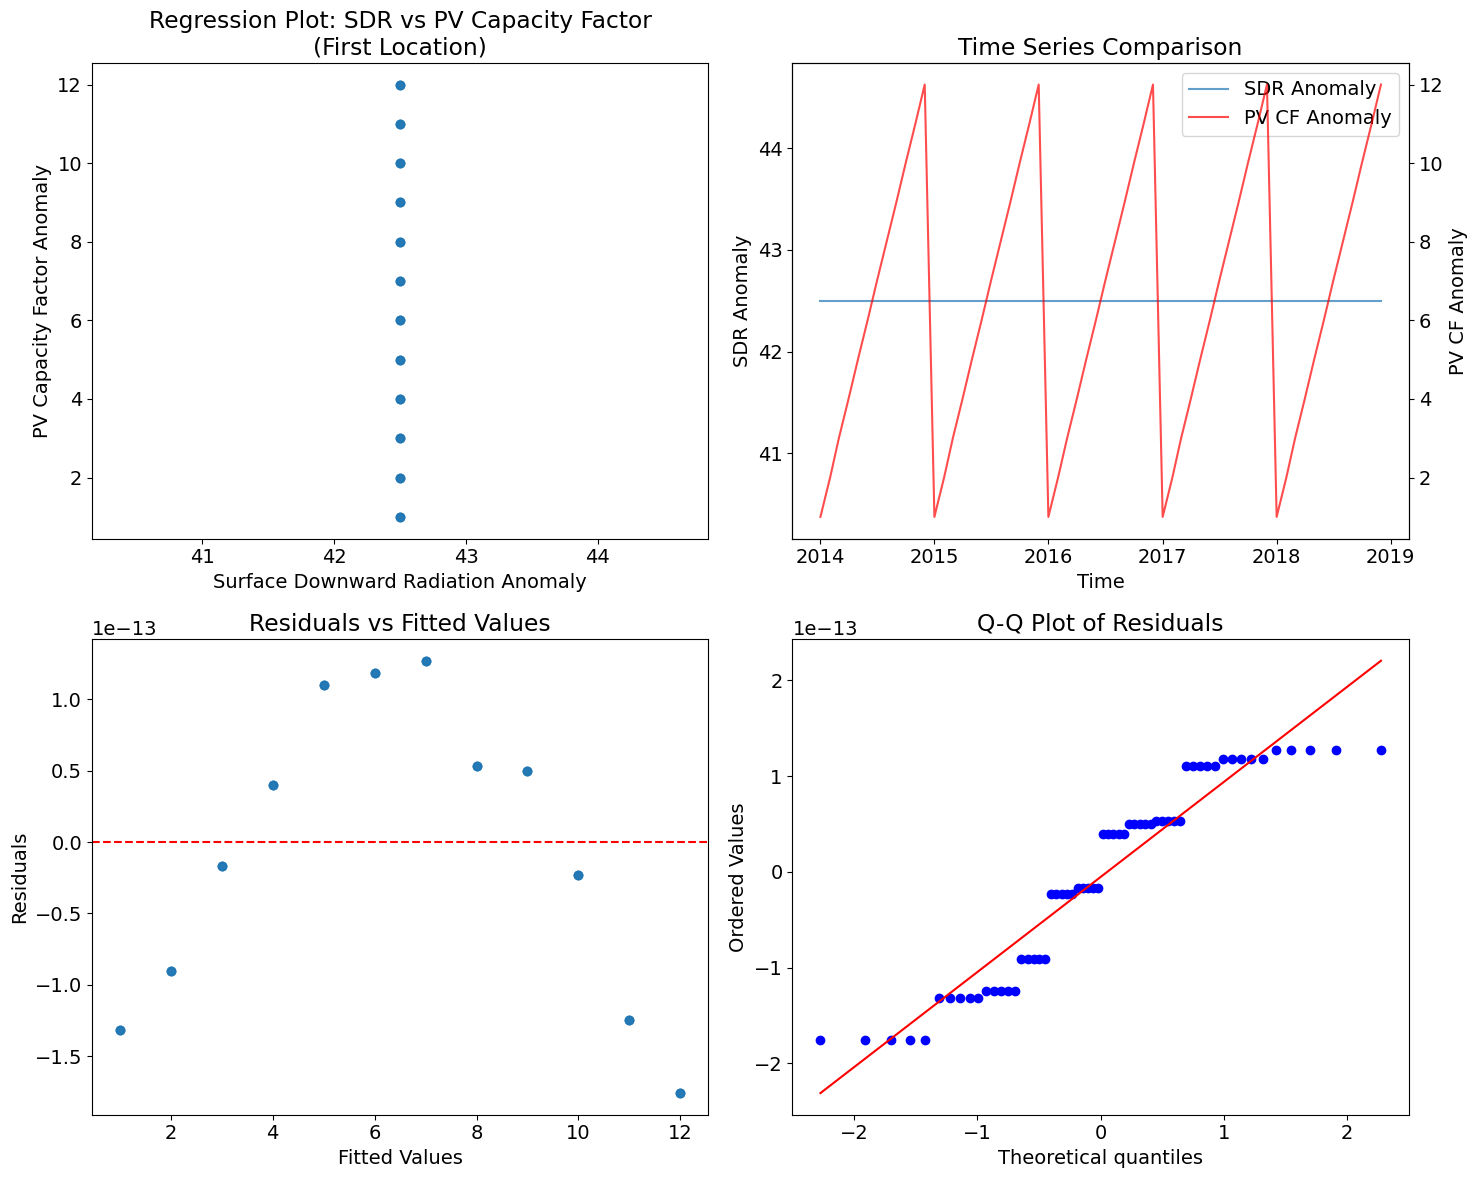


Performance Metrics:
R-squared: 1.0000
RMSE: 0.0000
MAE: 0.0000

Top 5 Most Influential Locations:
         Location  Coefficient
410  Location_410     0.004813
411  Location_411     0.004813
412  Location_412     0.004813
413  Location_413     0.004813
414  Location_414     0.004813


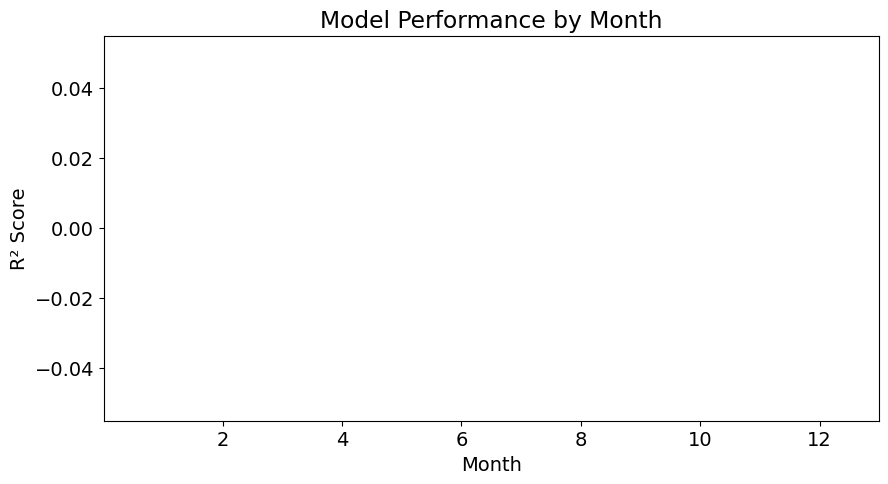

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

# 1. Prepare the data
common_index = df_sdr_anom.index.intersection(df_pvcf_anom.index)
X = df_sdr_anom.loc[common_index]
y = df_pvcf_anom.loc[common_index].iloc[:, 0]  # Select first column if multiple columns exist

# Select 5 years of data
five_years = common_index[:5*12]  # Assuming monthly data
X_5y = X.loc[five_years]
y_5y = y.loc[five_years]

# 2. Create and fit Linear Regression model
model = LinearRegression()
model.fit(X_5y, y_5y)

# Get predictions
y_pred = model.predict(X_5y)

# 3. Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Scatter plot with regression line for first location
ax = axes[0,0]
x_plot = X_5y.iloc[:,0]  # First location
sns.regplot(x=x_plot, y=y_5y.values, ax=ax, scatter_kws={'alpha':0.5})  # Added .values
ax.set_title('Regression Plot: SDR vs PV Capacity Factor\n(First Location)')
ax.set_xlabel('Surface Downward Radiation Anomaly')
ax.set_ylabel('PV Capacity Factor Anomaly')

# Plot 2: Time series comparison
ax = axes[0,1]
ax.plot(X_5y.index, X_5y.iloc[:,0], label='SDR Anomaly', alpha=0.7)
ax2 = ax.twinx()
ax2.plot(y_5y.index, y_5y, color='red', label='PV CF Anomaly', alpha=0.7)
ax.set_title('Time Series Comparison')
ax.set_xlabel('Time')
ax.set_ylabel('SDR Anomaly')
ax2.set_ylabel('PV CF Anomaly')
lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

# Plot 3: Residuals plot
ax = axes[1,0]
residuals = y_5y - y_pred
ax.scatter(y_pred, residuals, alpha=0.5)
ax.axhline(y=0, color='r', linestyle='--')
ax.set_title('Residuals vs Fitted Values')
ax.set_xlabel('Fitted Values')
ax.set_ylabel('Residuals')

# Plot 4: QQ plot of residuals
ax = axes[1,1]
stats.probplot(residuals, dist="norm", plot=ax)
ax.set_title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()

# 4. Calculate and print performance metrics
r2 = r2_score(y_5y, y_pred)
rmse = np.sqrt(mean_squared_error(y_5y, y_pred))
mae = np.mean(np.abs(residuals))

print("\nPerformance Metrics:")
print(f"R-squared: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

# 5. Feature importance (coefficients)
coef_df = pd.DataFrame({
    'Location': [f'Location_{i}' for i in range(len(model.coef_))],
    'Coefficient': model.coef_
})
coef_df['Abs_Coefficient'] = np.abs(coef_df['Coefficient'])
top_5_locations = coef_df.nlargest(5, 'Abs_Coefficient')

print("\nTop 5 Most Influential Locations:")
print(top_5_locations[['Location', 'Coefficient']])

# 6. Monthly Performance Analysis
monthly_r2 = []
for month in range(1, 13):
    month_mask = X_5y.index.month == month
    if sum(month_mask) > 0:
        y_month = y_5y[month_mask]
        y_pred_month = y_pred[month_mask]
        r2_month = r2_score(y_month, y_pred_month)
        monthly_r2.append((month, r2_month))

# Plot monthly R² values
plt.figure(figsize=(10, 5))
months, r2_values = zip(*monthly_r2)
plt.bar(months, r2_values)
plt.title('Model Performance by Month')
plt.xlabel('Month')
plt.ylabel('R² Score')
plt.show()

#### The model is overfitting, since it shows a perfecct R squared value of 1, 0 RMSE and 0 MAE. It shows a perfect correlation between variables. 

### Analyzing the relationship between the climate variables and the capacity factor

The code below:
- does a scatter plot the demand as a function of each climate variable on separate figures,
- computes the correlation between the capacity factor and each climate variable,
- computes the correlation matrix between climate variables removing values smaller than 0.3 in absolute value.

> ***Question***
> - Does their seem to be redundancies between climate variables?
> - Which climate variables seem to be most relevant to predict the capacity factor?
> - Discuss the limits of this analysis using correlations alone.

## Ensemble Methods: 
Using Lasso Regression to find R2, bagging Regressor, Feature Importances using MDI, Choose the stacking regressor, AdaBoost regressor, and  voting regressor (compare between DecisionTree, Random Forest and Lasso in each regressor method)

## RNN 
LSTM (Long Short Term Memory) Method: Ideal for capturing long-term dependencies in weather patterns
